## Exercise 03.1 


Nell'ambito di questa esercitazione, si intende verificare numericamente la correttezza della soluzione analitica proposta dalla teoria di Black-Scholes per l'Option Pricing. Si considera una dinamica stocastica per l'evoluzione nel tempo del prezzo di un asset, che si comporta in maniera simile a un Moto Browniano Geometrico (GBM), caratterizzato da un tasso di interesse risk-free costante $r$ (che equivale al drift browniano) e una volatilità $\sigma$.

Nello specifico consideriamo opzioni europee, le quali funzionano nel seguente modo: il venditore garantisce al compratore il diritto di acquistare (call option) o di vendere (put option) un asset ad un prezzo fissato $K$ in un determinato momento futuro $T$ . Il profitto che può avere il compratore dalle opzioni di tipo call è dato da ($S(T)$ è il valore dell'asset al tempo finale):

$$\max[0,S(T)-K]=(S(T)-K)^+ $$

Mentre per quelle di tipo put è

$$\max[0,K-S(T)]=(K-S(T))^+ $$

La domanda che ci si pone è quindi legata al prezzo a cui il venditore dovrebbe inizialmente vendere l'opzione. La teoria di Black-Scholes, sotto l'ipotesi di mercato efficiente e di $S\sim GBM(r,\sigma^2)$, fornisce una soluzione analitica che può essere confrontata con il nostro approccio numerico. Considerando che il $GBM$ dà una variazione nel tempo del tipo:

$$S(t)=S_0\exp\bigg[\big(\mu-\frac{1}{2}\sigma^2\big)t+\sigma W(t)\bigg]$$

con $W(t)\sim N(0,t)$ distribuzione normale con media 0 e deviazione standard t, una prima possibile soluzione consiste nel campionare il valor medio delle quantità $\langle e^{-rT}(S(T)-K)\rangle $ per le call e $\langle e^{-rT}(K-S(T))\rangle $ per le put. L'esponenziale tiene conto del fatto che, se il compratore avesse acquistato l'asset al posto che l'opzione sullo stesso, nel frattempo attraverso la banca avrebbe maturato un interesse calcolabile con un fattore di $e^{+rT}$.

Per la simulazione sono stati quindi seguiti due differenti approcci: il primo consiste nel campionare direttamente $W(T)$ (evoluzione con un unico step temporale), mentre l'altro consiste nello sfruttare la relazione ricorsiva:

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
    
per far evolvere il sistema in tanti step più piccoli.

Sono stati usati i seguenti parametri:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

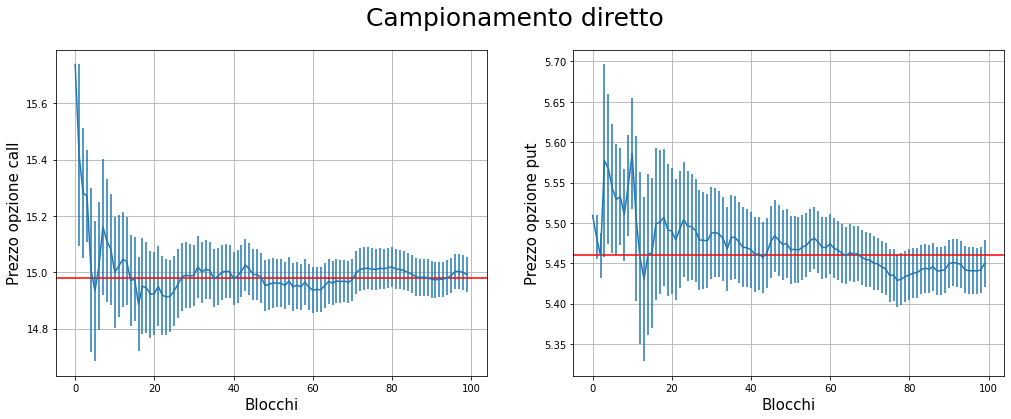

In [22]:
yC, errC, yP, errP=np.loadtxt("c++/outfile311.txt", unpack=True)

N=yC.shape[0]
x=np.arange(N) #N andrebbe preso dai file prodotti in c++

fig=plt.figure(figsize=(17,6))
plt.suptitle("Campionamento diretto", fontsize = 25)

plt.subplot(1,2,1)   
plt.errorbar(x,yC,yerr=errC)
plt.axhline(y=14.98, color = 'r', linestyle = '-', label = "Risultato analitico\n14.976")
plt.xlabel('Blocchi', fontsize=15)
plt.ylabel("Prezzo opzione call", fontsize=15)
plt.grid(True)

plt.subplot(1,2,2)
plt.errorbar(x,yP,yerr=errP)
plt.axhline(y=5.46, color = 'r', linestyle = '-', label = "Risultato analitico\n5.4595")
plt.xlabel('Blocchi', fontsize=15)
plt.ylabel('Prezzo opzione put', fontsize=15)
plt.grid(True)
plt.show()    

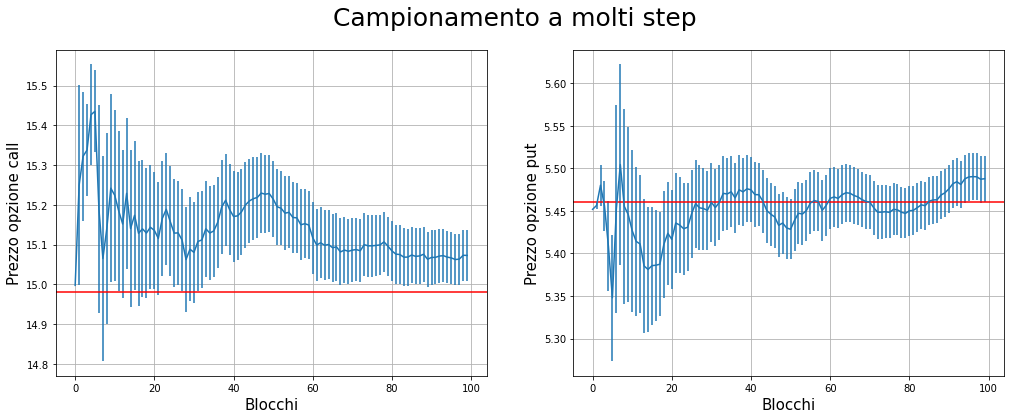

In [27]:
yDC, errDC, yDP, errDP=np.loadtxt("c++/outfile312.txt", unpack=True)

N=yDC.shape[0]
x=np.arange(N) #N andrebbe preso dai file prodotti in c++

fig=plt.figure(figsize=(17,6))
plt.suptitle("Campionamento a molti step", fontsize = 25)

plt.subplot(1,2,1)   
plt.errorbar(x,yDC,yerr=errDC)
plt.axhline(y=14.98, color = 'r', linestyle = '-', label = "Risultato analitico\n14.976")
plt.xlabel('Blocchi', fontsize=15)
plt.ylabel("Prezzo opzione call", fontsize=15)
plt.grid(True)

plt.subplot(1,2,2) 
plt.errorbar(x,yDP,yerr=errDP)
plt.axhline(y=5.46, color = 'r', linestyle = '-', label = "Risultato analitico\n5.4595")
plt.xlabel('Blocchi', fontsize=15)
plt.ylabel("Prezzo opzione put", fontsize=15)
plt.grid(True)
plt.show()    

Per entrambe le simulazioni, sia nel caso delle opzioni call che put, si vede convergenza verso il valore teorico quasi sempre nel limite di una $\sigma$.